In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the data
# Update the path below to the correct location of your CSV file in Google Drive
df = pd.read_csv(r"/content/Healthcare_data_1.csv")

# Initial Inspection
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
display(df.describe(include='all'))

Dataset Shape: (4066, 32)

First 5 rows:
   AdmissionID  PatientID       HospitalName        Department         Doctor  \
0            1      18032  Westside Hospital        Gynecology      Dr. Smith   
1            2      79655   Mountview Clinic         Emergency  Dr. Hernandez   
2            3      68910   Eastwood Medical       Orthopedics   Dr. Gonzalez   
3            4      49498  Westside Hospital         Emergency      Dr. Brown   
4            5      48970   Mountview Clinic  Gastroenterology   Dr. Williams   

  AdmissionDate DischargeDate  LengthOfStay              Name  Gender  ...  \
0    28-01-2024    01-02-2024             4  Charles Martinez    Male  ...   
1    23-03-2025    27-03-2025             4     Jessica Davis    Male  ...   
2    10-09-2023    16-09-2023             6      David Garcia  Female  ...   
3    03-08-2024    06-08-2024             3        John Brown  Female  ...   
4    20-12-2024    24-12-2024             4     Jessica Smith    Male  ...   

   

,AdmissionID,PatientID,HospitalName,Department,Doctor,AdmissionDate,DischargeDate,LengthOfStay,Name,Gender,...,Procedure,Medication,Outcome,TreatmentCost,PaymentID,TotalCost,InsuranceCovered,OutOfPocket,PaymentStatus,Month
count,4066.000000,4066.000000,4066,4066,4066,4066,4066,4066.000000,4066,4065,...,4065,4065,4065,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065,4065
unique,NaN,NaN,10,10,15,992,989,NaN,401,3,...,12,12,5,NaN,NaN,NaN,NaN,NaN,4,12
top,NaN,NaN,Sunrise Medical,Dermatology,Dr. Lopez,31-05-2024,16-09-2023,NaN,Michael Gonzalez,Female,...,Blood Test,Paracetamol,Recovered,NaN,NaN,NaN,NaN,NaN,Paid,Apr
freq,NaN,NaN,436,419,295,12,13,NaN,20,2000,...,379,390,2859,NaN,NaN,NaN,NaN,NaN,2844,386
mean,2033.500000,54969.237334,NaN,NaN,NaN,NaN,NaN,4.957698,NaN,NaN,...,NaN,NaN,NaN,9884.191292,551301.149323,10386.720819,6173.222084,3710.969274,NaN,NaN
std,1173.897426,25944.952857,NaN,NaN,NaN,NaN,NaN,1.984982,NaN,NaN,...,NaN,NaN,NaN,5061.808256,259169.800392,5337.691519,4039.047436,3219.839658,NaN,NaN
min,1.000000,10046.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,200.000000,100091.000000,200.240000,0.000000,10.680000,NaN,NaN
25%,1017.250000,32150.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,...,NaN,NaN,NaN,6520.820000,331412.000000,6837.730000,3589.960000,1568.410000,NaN,NaN
50%,2033.500000,54599.000000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,...,NaN,NaN,NaN,8901.460000,551652.000000,9378.910000,5503.650000,2877.100000,NaN,NaN
75%,3049.750000,77582.250000,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,...,NaN,NaN,NaN,11896.650000,775791.000000,12517.830000,8002.980000,4789.370000,NaN,NaN


In [9]:
# 1. Check for Missing Values
print("Missing Values:")
print(df.isnull().sum())

# 2. Check for Duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# 3. Check Unique Values for Key Categorical Columns
categorical_columns = ['Department', 'Doctor', 'Gender', 'City', 'State', 'InsuranceProvider', 'BloodGroup', 'DiseaseName', 'Severity', 'RiskLevel', 'Procedure', 'Medication', 'Outcome', 'PaymentStatus']
for col in categorical_columns:
    print(f"\nUnique values in {col}: {df[col].nunique()}")

# 4. Data Type Conversion
# Convert dates to datetime
df['AdmissionDate'] = pd.to_datetime(df['AdmissionDate'], format='%d-%m-%Y')
df['DischargeDate'] = pd.to_datetime(df['DischargeDate'], format='%d-%m-%Y')

# 5. Handle any potential data inconsistencies (e.g., in Gender, if any)
print("\nGender value counts:")
print(df['Gender'].value_counts())

Missing Values:
AdmissionID             0
PatientID               0
HospitalName            0
Department              0
Doctor                  0
AdmissionDate           0
DischargeDate           0
LengthOfStay            0
Name                    0
Gender                  1
Age                     1
City                    1
State                   1
InsuranceProvider       1
BloodGroup              1
Contact                 1
DiagnosisID             1
DiseaseName             1
Severity                1
RiskLevel               1
Notes                4066
TreatmentID             1
Procedure               1
Medication              1
Outcome                 1
TreatmentCost           1
PaymentID               1
TotalCost               1
InsuranceCovered        1
OutOfPocket             1
PaymentStatus           1
Month                   1
dtype: int64

Number of duplicate rows: 0

Unique values in Department: 10

Unique values in Doctor: 15

Unique values in Gender: 3

Unique values in Ci

In [13]:
# Remove rows where Gender is 'Other'
df = df[df['Gender'] != 'Other'].copy()

# Check Gender value counts again
print("\nGender value counts after removing 'Other':")
print(df['Gender'].value_counts())


Gender value counts after removing 'Other':
Gender
Female    2000
Male      1988
Name: count, dtype: int64


In [14]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Check for missing values again
print("Missing Values after dropping rows with missing values:")
print(df.isnull().sum())

Missing Values after dropping rows with missing values:
AdmissionID          0
PatientID            0
HospitalName         0
Department           0
Doctor               0
AdmissionDate        0
DischargeDate        0
LengthOfStay         0
Name                 0
Gender               0
Age                  0
City                 0
State                0
InsuranceProvider    0
BloodGroup           0
Contact              0
DiagnosisID          0
DiseaseName          0
Severity             0
RiskLevel            0
TreatmentID          0
Procedure            0
Medication           0
Outcome              0
TreatmentCost        0
PaymentID            0
TotalCost            0
InsuranceCovered     0
OutOfPocket          0
PaymentStatus        0
Month                0
dtype: int64


In [15]:
# Step 4: Feature Engineering

# 1. Age Groups
if 'Age' in df.columns:
    df['age_group'] = pd.cut(
        df['Age'],
        bins=[0, 12, 19, 35, 50, 65, 100],
        labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
    )

# 2. Month of Admission
if 'AdmissionDate' in df.columns:
    df['admission_month'] = df['AdmissionDate'].dt.month
    df['admission_month_name'] = df['AdmissionDate'].dt.strftime("%B")

# 3. Cost per day (agar cost column hai)
if 'TotalCost' in df.columns and 'LengthOfStay' in df.columns:
    # Ensure LengthOfStay is not zero to avoid division by zero
    df['cost_per_day'] = df['TotalCost'] / df['LengthOfStay'].replace(0, 1)

# 4. Weekend admission (0 = Weekday, 1 = Weekend)
if 'AdmissionDate' in df.columns:
    df['weekend_admission'] = df['AdmissionDate'].dt.weekday.isin([5,6]).astype(int)

print("Feature Engineering")
display(df.head())

Feature Engineering


,AdmissionID,PatientID,HospitalName,Department,Doctor,AdmissionDate,DischargeDate,LengthOfStay,Name,Gender,...,TotalCost,InsuranceCovered,OutOfPocket,PaymentStatus,Month,age_group,admission_month,admission_month_name,cost_per_day,weekend_admission
0,1,18032,Westside Hospital,Gynecology,Dr. Smith,2024-01-28,2024-02-01,4,Charles Martinez,Male,...,14559.08,10393.85,3609.55,Pending,Jan,Teen,1,January,3639.770000,1
1,2,79655,Mountview Clinic,Emergency,Dr. Hernandez,2025-03-23,2025-03-27,4,Jessica Davis,Male,...,13730.87,9209.47,3460.93,Denied,Mar,Senior,3,March,3432.717500,1
2,3,68910,Eastwood Medical,Orthopedics,Dr. Gonzalez,2023-09-10,2023-09-16,6,David Garcia,Female,...,4209.02,2452.81,1719.07,Paid,Sep,Adult,9,September,701.503333,1
3,4,49498,Westside Hospital,Emergency,Dr. Brown,2024-08-03,2024-08-06,3,John Brown,Female,...,6474.13,3140.24,2769.26,Pending,Aug,Senior,8,August,2158.043333,1
4,5,48970,Mountview Clinic,Gastroenterology,Dr. Williams,2024-12-20,2024-12-24,4,Jessica Smith,Male,...,23046.80,17267.68,4089.87,Paid,Dec,Young Adult,12,December,5761.700000,0


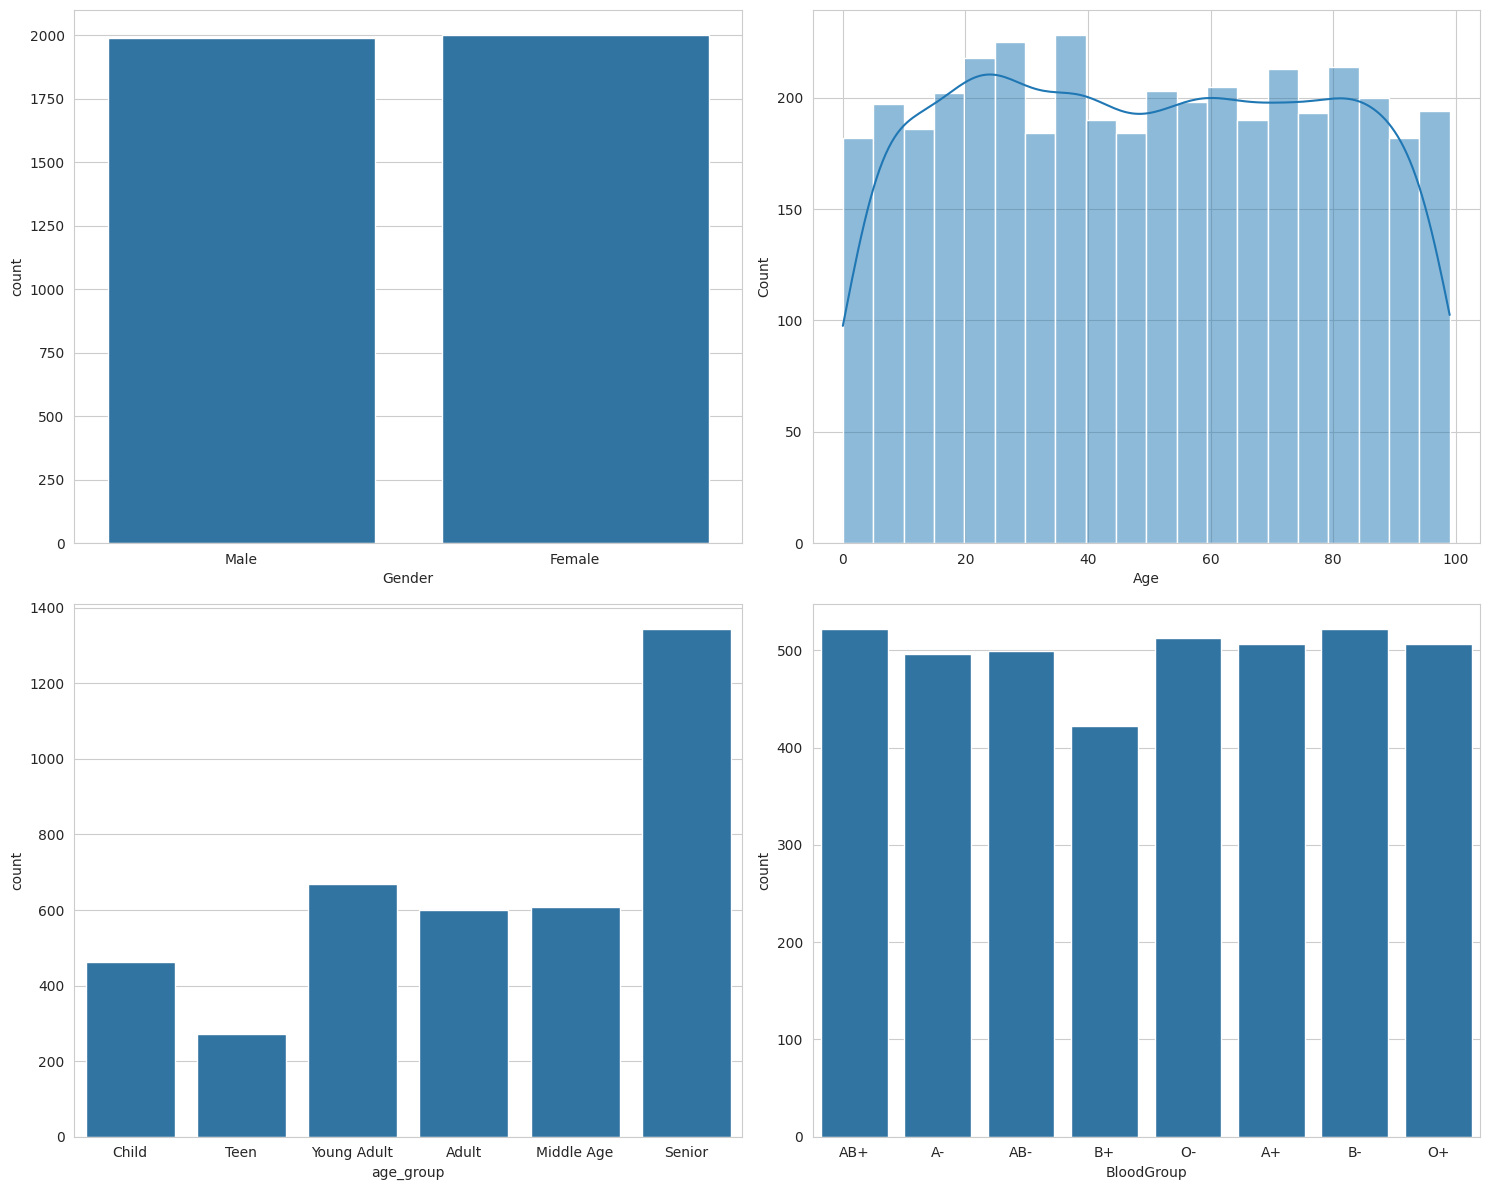

In [16]:
# Step 5 — Exploratory Data Analysis (EDA) using python
sns.set_style("whitegrid")

# 1. Patient Demographics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(data=df, x='Gender', ax=axes[0,0])
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[0,1])
sns.countplot(data=df, x='age_group', order=['Child', 'Teen', 'Young Adult',
                                            'Adult', 'Middle Age', 'Senior'], ax=axes[1,0])
sns.countplot(data=df, x='BloodGroup', ax=axes[1,1])
plt.tight_layout()
plt.show()

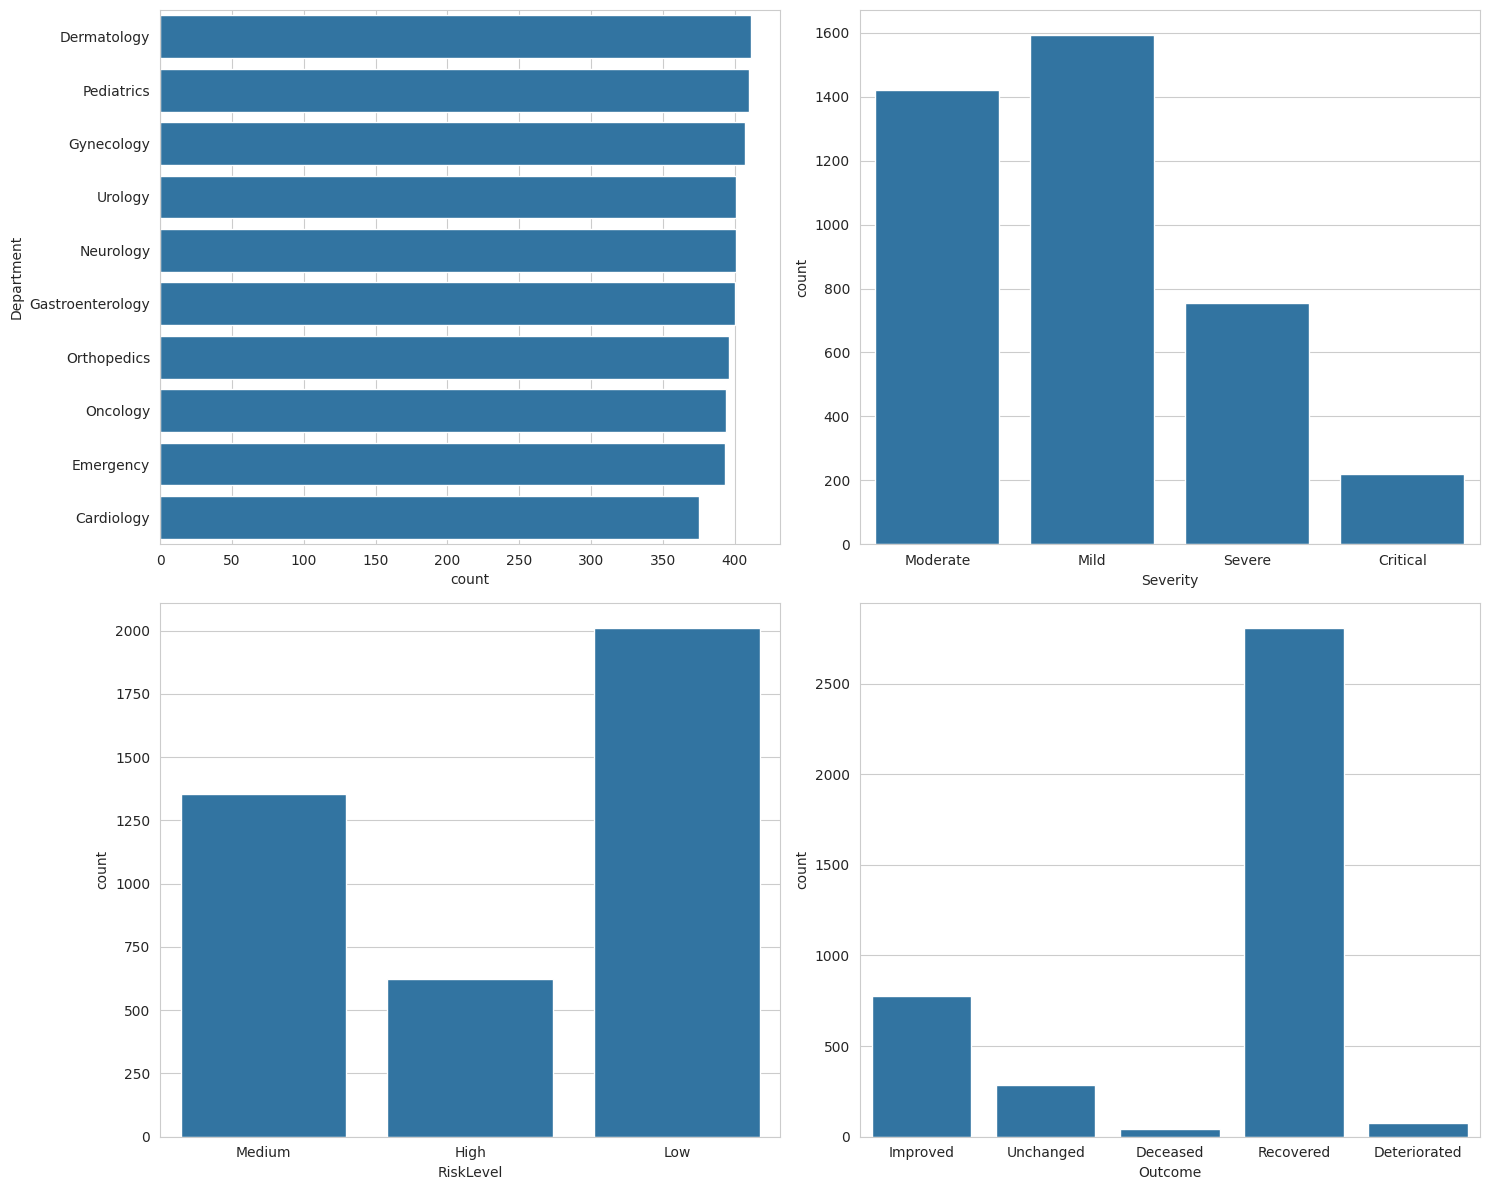

In [17]:
# 2. Clinical Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(data=df, y='Department',
              order=df['Department'].value_counts().index, ax=axes[0,0])
sns.countplot(data=df, x='Severity', ax=axes[0,1])
sns.countplot(data=df, x='RiskLevel', ax=axes[1,0])
sns.countplot(data=df, x='Outcome', ax=axes[1,1])
plt.tight_layout()
plt.show()

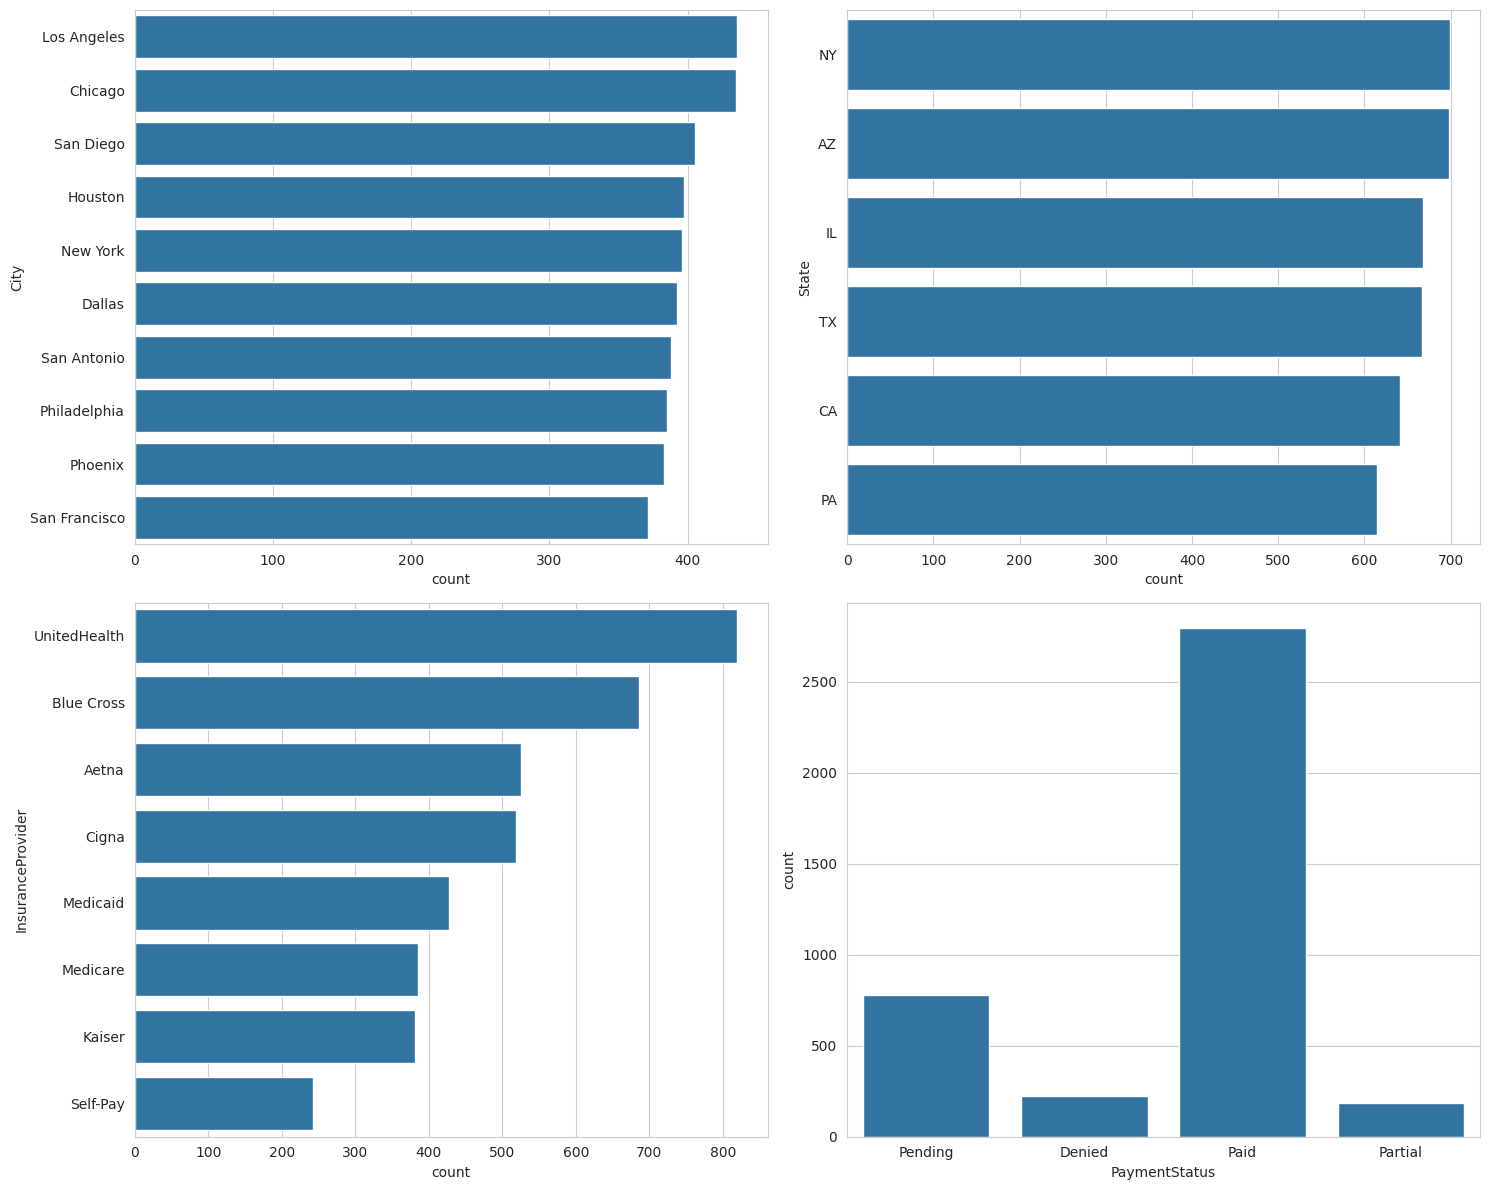

In [18]:
# 3. Geographical and Payment Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.countplot(data=df, y='City', order=df['City'].value_counts().index, ax=axes[0,0])
sns.countplot(data=df, y='State', order=df['State'].value_counts().index, ax=axes[0,1])
sns.countplot(data=df, y='InsuranceProvider', order=df['InsuranceProvider'].value_counts().index, ax=axes[1,0])
sns.countplot(data=df, x='PaymentStatus', ax=axes[1,1])
plt.tight_layout()
plt.show()

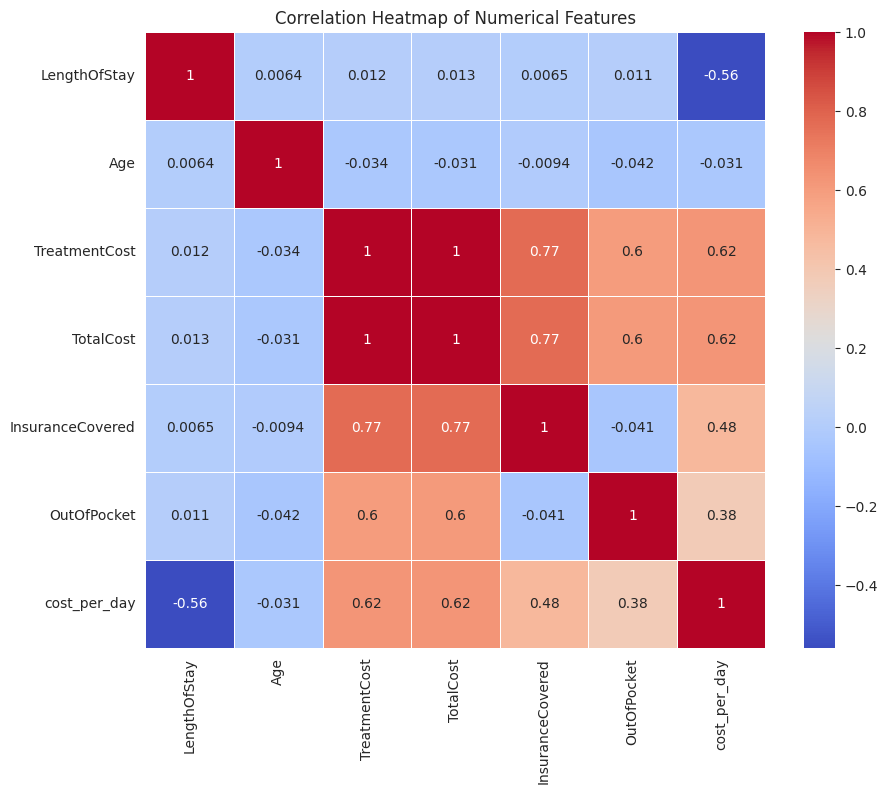

In [19]:
# 4. Correlation Heatmap (for numerical fields)
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_df = df[['LengthOfStay', 'Age', 'TreatmentCost', 'TotalCost',
                   'InsuranceCovered', 'OutOfPocket', 'cost_per_day']] # Removed 'HospitalRevenue' and changed 'CostPerDay' to 'cost_per_day'

# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Display the plot
plt.show()

In [21]:
# Save the processed dataframe to a new CSV file in your Google Drive
# Update the path below to your desired location in Google Drive
output_path = r"/content/drive/MyDrive/processed_healthcare_data.csv"
df.to_csv(output_path, index=False)

print(f"Processed data saved to: {output_path}")

Processed data saved to: /content/drive/MyDrive/processed_healthcare_data.csv


You can now download the `processed_healthcare_data.csv` file from your Google Drive.

Let me know if you'd like to continue with the exploratory data analysis or if you have any other questions!